In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns

import json
import gc
import csv

from scipy.stats import uniform
from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")

In [3]:
df_low = pd.read_csv('./dataset/low_popularity_spotify_data.csv')
df_high = pd.read_csv('./dataset/high_popularity_spotify_data.csv')
df_low["popularity"] = "Low"
df_high["popularity"] = "High"
df = pd.concat([df_low, df_high])
print("Dataset shape {} \nLow popularity dataset size: {}, \nHigh dataset size: {}, \nTotal data: {}".format(df.shape, df_low.size, df_high.size, df.size))

Dataset shape (4831, 30) 
Low popularity dataset size: 94350, 
High dataset size: 50580, 
Total data: 144930


# Understanding the data

For this task I use a dataset from Kaggle Spotify which describes features of a song include information about the song such as the artist name, album name and release date and audio features include key, valence, danceability and energy which are results of spotify’s audio analysis. This dataset consist in two part, low and high popularity. I picked this data because I know music, a little. That’s why I think I could understand some features of this data.

Let’s start!. I concatenated those parts as one complete dataset. As we can see in the features of dataset, most of them are object. Data has 4831 rows, reasonable to used later for a model I think so. Here a small of view of these dataset, what a little command can do for us:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4831 entries, 0 to 1685
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time_signature            4830 non-null   float64
 1   track_popularity          4831 non-null   int64  
 2   speechiness               4830 non-null   float64
 3   danceability              4830 non-null   float64
 4   playlist_name             4831 non-null   object 
 5   track_artist              4831 non-null   object 
 6   duration_ms               4830 non-null   float64
 7   energy                    4830 non-null   float64
 8   playlist_genre            4831 non-null   object 
 9   playlist_subgenre         4831 non-null   object 
 10  track_href                4830 non-null   object 
 11  track_name                4831 non-null   object 
 12  mode                      4830 non-null   float64
 13  uri                       4830 non-null   object 
 14  type    

In [5]:
df.head(10)

,time_signature,track_popularity,speechiness,danceability,playlist_name,track_artist,duration_ms,energy,playlist_genre,playlist_subgenre,...,playlist_id,track_id,valence,key,tempo,loudness,acousticness,liveness,track_album_name,popularity
0,4.0,23,0.0393,0.636,Rock Classics,Creedence Clearwater Revival,138053.0,0.7460,rock,classic,...,37i9dQZF1DWXRqgorJj26U,5e6x5YRnMJIKvYpZxLqdpH,0.432,0.0,132.310,-3.785,0.0648,0.1730,The Long Road Home - The Ultimate John Fogerty...,Low
1,4.0,53,0.0317,0.572,Rock Classics,Van Halen,241600.0,0.8350,rock,classic,...,37i9dQZF1DWXRqgorJj26U,5FqYA8KfiwsQvyBI4IamnY,0.795,0.0,129.981,-6.219,0.1710,0.0702,The Collection,Low
2,4.0,55,0.0454,0.591,Rock Classics,Stevie Nicks,329413.0,0.8040,rock,classic,...,37i9dQZF1DWXRqgorJj26U,5LNiqEqpDc8TuqPy79kDBu,0.658,0.0,111.457,-7.299,0.3270,0.0818,Bella Donna (Deluxe Edition),Low
3,4.0,64,0.1010,0.443,Jazz Classics,"Ella Fitzgerald, Louis Armstrong",185160.0,0.1040,jazz,classic,...,37i9dQZF1DXbITWG1ZJKYt,78MI7mu1LV1k4IA2HzKmHe,0.394,0.0,76.474,-17.042,0.9130,0.1910,"Love, Ella",Low
4,4.0,62,0.0298,0.685,Jazz Classics,Galt MacDermot,205720.0,0.4720,jazz,classic,...,37i9dQZF1DXbITWG1ZJKYt,6MN6yRVriszuyAVlyF8ndB,0.475,9.0,80.487,-9.691,0.7850,0.2240,Shapes of Rhythm/Woman Is Sweeter,Low
5,4.0,61,0.0566,0.670,Jazz Classics,"Frank Sinatra, Count Basie",147147.0,0.3650,jazz,classic,...,37i9dQZF1DXbITWG1ZJKYt,2dR5WkrpwylTuT3jRWNufa,0.450,0.0,119.347,-10.158,0.5250,0.0575,Ultimate Sinatra,Low
6,4.0,60,0.0914,0.663,Jazz Classics,"Ella Fitzgerald, Louis Armstrong",354533.0,0.2640,jazz,classic,...,37i9dQZF1DXbITWG1ZJKYt,33jt3kYWjQzqn3xyYQ5ZEh,0.657,0.0,122.482,-14.571,0.7060,0.1000,The Complete Ella And Louis On Verve,Low
7,4.0,55,0.0373,0.525,Jazz Classics,Benny Goodman,195533.0,0.2220,jazz,classic,...,37i9dQZF1DXbITWG1ZJKYt,1xUJ1mdLAysxNBtO9w3J2g,0.645,10.0,156.364,-11.065,0.8360,0.0510,B. G. In Hi Fi,Low
8,4.0,54,0.0363,0.336,Jazz Classics,Kenny Dorham,190400.0,0.0619,jazz,classic,...,37i9dQZF1DXbITWG1ZJKYt,3GOZbK2epuHzCt5YvvVFHO,0.197,5.0,60.705,-20.494,0.9850,0.1100,Quiet Kenny,Low
9,4.0,53,0.0407,0.742,Jazz Classics,Horace Silver,438280.0,0.6710,jazz,classic,...,37i9dQZF1DXbITWG1ZJKYt,1CDBaGlisZlOJzvx88lL8A,0.591,5.0,127.359,-8.142,0.7940,0.1220,Song For My Father,Low


# High level review

## Basic statistics

Most of analysis start with descriptive statistics, and get some insights from it. For example, in this data we can find mean, standard deviation, percentiles with one simple command:



In [6]:
df.describe()

,time_signature,track_popularity,speechiness,danceability,duration_ms,energy,mode,instrumentalness,valence,key,tempo,loudness,acousticness,liveness
count,4830.000000,4831.000000,4830.000000,4830.000000,4.830000e+03,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000
mean,3.936646,54.761126,0.101738,0.622311,2.061508e+05,0.586691,0.562112,0.201053,0.481930,5.233333,118.269293,-9.281627,0.341217,0.167613
std,0.409712,19.828573,0.101032,0.187706,8.174556e+04,0.246263,0.496178,0.351918,0.258036,3.580857,28.512615,7.129396,0.325382,0.124429
min,1.000000,11.000000,0.021900,0.058900,3.537500e+04,0.000202,0.000000,0.000000,0.029600,0.000000,48.232000,-48.069000,0.000004,0.021000
25%,4.000000,41.000000,0.038600,0.525000,1.590000e+05,0.442250,0.000000,0.000000,0.275000,2.000000,96.063000,-10.297750,0.052925,0.095400
50%,4.000000,56.000000,0.056100,0.653000,1.948665e+05,0.633000,1.000000,0.000091,0.483000,5.000000,118.059500,-7.191000,0.224500,0.118000
75%,4.000000,72.000000,0.118000,0.758000,2.334780e+05,0.777000,1.000000,0.200500,0.690000,8.000000,136.723500,-5.336750,0.590000,0.195000
max,5.000000,100.000000,0.927000,0.979000,1.355260e+06,0.998000,1.000000,0.991000,0.987000,11.000000,241.426000,1.318000,0.996000,0.979000


One brief analysis in the feature “speechiness”, the mean is skewed to left because max value is near to 1. In the picture bellow, we can see that. As insight we can understand that most of the “speechiness” feature values are under [0, 0.1].

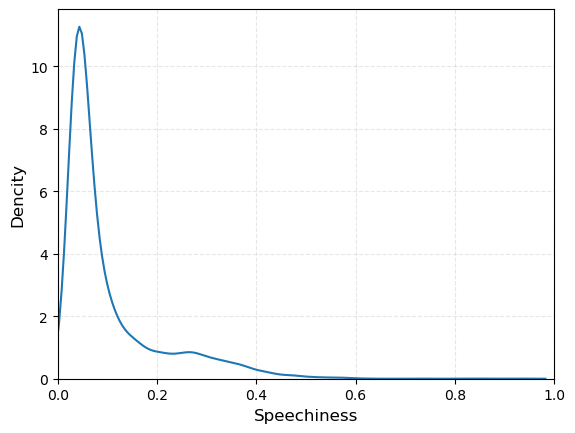

In [7]:
sns.kdeplot(data = df['speechiness'])
plt.xlim([0,1])  
plt.xlabel("Speechiness", size=12)    
plt.ylabel("Dencity", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")     
plt.show()

For other features, we can do the same analysis.

## Check whole picture of values from data

This part I picked up from Kaggle Notebooks. This can help us to see whole picture of data like unique values, data types and so on. In this code, explore_dataset is defined to receive a dataset and output a table.

In [8]:
# Let's create a detailed table for our features

# Create an empty list to store the output data
def explore_dataset(df):
    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 5
        if df.loc[:, col].nunique() <= 30:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

In [9]:
explore_dataset(df)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,time_signature,4,"[4.0, 3.0, 5.0, 1.0, nan]",float64
1,track_popularity,86,-,int64
2,speechiness,1039,-,float64
3,danceability,820,-,float64
4,playlist_name,116,-,object
5,track_artist,3390,-,object
6,duration_ms,4148,-,float64
7,energy,1119,-,float64
8,playlist_genre,35,-,object
9,playlist_subgenre,84,-,object


**Insights:** The table bellow tell us there are many unique values which means diversity. Only some of them have less values like ‘time_signature’, ‘playlist_genre’, ‘mode’.

## Checking Null and NaN values

I think this step is a must. It’s necessary to have a clean data otherwise later during analysis or modelling it’ll bring noise.

In [10]:
null_finder = df.isnull().sum()
print(" ***** Number of Null Values by row: ***** ")
null_finder.where(null_finder > 0).dropna()

 ***** Number of Null Values by row: ***** 


time_signature      1.0
speechiness         1.0
danceability        1.0
duration_ms         1.0
energy              1.0
track_href          1.0
mode                1.0
uri                 1.0
type                1.0
analysis_url        1.0
id                  1.0
instrumentalness    1.0
valence             1.0
key                 1.0
tempo               1.0
loudness            1.0
acousticness        1.0
liveness            1.0
track_album_name    1.0
dtype: float64

Due most of the feature only has 1 Null/NaN value so I think we can drop it by row(axis = 0) better. In other cases, it’s better do it by column but it depends on the case.

In [11]:
na_list = null_finder.where(null_finder > 0).dropna()
print(na_list.index)

Index(['time_signature', 'speechiness', 'danceability', 'duration_ms',
       'energy', 'track_href', 'mode', 'uri', 'type', 'analysis_url', 'id',
       'instrumentalness', 'valence', 'key', 'tempo', 'loudness',
       'acousticness', 'liveness', 'track_album_name'],
      dtype='object')


## Check if index is duplicated

This issue is here because when we create dataset, we joint two groups(low and high popularity) and add same index. Why is necessary this step? because during univariate analysis, pandas use index to iterate data and because it’s duplicated, it fails. So this step is necesary.

In [12]:
if df.index.is_unique:
    print('Indexes are unique.')
else:
    print('There are duplicated indexes.')
    

There are duplicated indexes.


Due duplicated index, we need up clean and update it. There are many ways to do that. Here one way:

In [13]:
df.index = range(0, df.shape[0])
if df.index.is_unique:
    print('Indexes are unique.')
else:
    print('There are duplicated indexes.')
df.head(-5)

Indexes are unique.


,time_signature,track_popularity,speechiness,danceability,playlist_name,track_artist,duration_ms,energy,playlist_genre,playlist_subgenre,...,playlist_id,track_id,valence,key,tempo,loudness,acousticness,liveness,track_album_name,popularity
0,4.0,23,0.0393,0.636,Rock Classics,Creedence Clearwater Revival,138053.0,0.746,rock,classic,...,37i9dQZF1DWXRqgorJj26U,5e6x5YRnMJIKvYpZxLqdpH,0.432,0.0,132.310,-3.785,0.0648,0.1730,The Long Road Home - The Ultimate John Fogerty...,Low
1,4.0,53,0.0317,0.572,Rock Classics,Van Halen,241600.0,0.835,rock,classic,...,37i9dQZF1DWXRqgorJj26U,5FqYA8KfiwsQvyBI4IamnY,0.795,0.0,129.981,-6.219,0.1710,0.0702,The Collection,Low
2,4.0,55,0.0454,0.591,Rock Classics,Stevie Nicks,329413.0,0.804,rock,classic,...,37i9dQZF1DWXRqgorJj26U,5LNiqEqpDc8TuqPy79kDBu,0.658,0.0,111.457,-7.299,0.3270,0.0818,Bella Donna (Deluxe Edition),Low
3,4.0,64,0.1010,0.443,Jazz Classics,"Ella Fitzgerald, Louis Armstrong",185160.0,0.104,jazz,classic,...,37i9dQZF1DXbITWG1ZJKYt,78MI7mu1LV1k4IA2HzKmHe,0.394,0.0,76.474,-17.042,0.9130,0.1910,"Love, Ella",Low
4,4.0,62,0.0298,0.685,Jazz Classics,Galt MacDermot,205720.0,0.472,jazz,classic,...,37i9dQZF1DXbITWG1ZJKYt,6MN6yRVriszuyAVlyF8ndB,0.475,9.0,80.487,-9.691,0.7850,0.2240,Shapes of Rhythm/Woman Is Sweeter,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4821,4.0,68,0.0626,0.792,Afro-Latin Party,Ayra Starr,185093.0,0.503,latin,afro-latin,...,0oU30cCr8klmMsuOKHDLkh,1rrqJ9QkOBYJlsZgqqwxgB,0.381,1.0,99.970,-8.044,0.0369,0.0959,Rush,High
4822,4.0,68,0.1870,0.637,Afro-Latin Party,"Rotimi, Wale",185461.0,0.501,latin,afro-latin,...,0oU30cCr8klmMsuOKHDLkh,6XM53PbvlzhuNtJZtpl7RP,0.431,0.0,103.993,-6.148,0.2290,0.0990,The Beauty of Becoming,High
4823,4.0,68,0.1950,0.843,Afro-Latin Party,"Drake, Tems",192418.0,0.485,latin,afro-latin,...,0oU30cCr8klmMsuOKHDLkh,08XWh5c0BMyD1nKVxxl91z,0.689,10.0,100.053,-8.735,0.1810,0.1070,Certified Lover Boy,High
4824,5.0,71,0.2310,0.613,Afro-Latin Party,Tems,180000.0,0.549,latin,afro-latin,...,0oU30cCr8klmMsuOKHDLkh,2dFqK2ZkYB9Xc47gr3xXWl,0.780,9.0,123.879,-8.187,0.0970,0.1160,If Orange Was A Place,High


## Dataframe data type analysis

Before start the analysis, we have to see if our data is numerical or categorical. Based on that we can apply different techniques.

In [14]:
# Separation of data types for EDA

cat_features = df.select_dtypes(exclude = np.number).columns
num_features = df.select_dtypes(include = np.number).columns
print( "Quantity of Categorical features: ", len(cat_features),"\nCategorical features:\n", cat_features)
print( "\nQuantity of Numerical features: ", len(num_features),"\nNumerical features:\n", num_features)


Quantity of Categorical features:  16 
Categorical features:
 Index(['playlist_name', 'track_artist', 'playlist_genre', 'playlist_subgenre',
       'track_href', 'track_name', 'uri', 'type', 'track_album_release_date',
       'analysis_url', 'id', 'track_album_id', 'playlist_id', 'track_id',
       'track_album_name', 'popularity'],
      dtype='object')

Quantity of Numerical features:  14 
Numerical features:
 Index(['time_signature', 'track_popularity', 'speechiness', 'danceability',
       'duration_ms', 'energy', 'mode', 'instrumentalness', 'valence', 'key',
       'tempo', 'loudness', 'acousticness', 'liveness'],
      dtype='object')


There are 16 categorical features. Those values mainly are strings because represent artist data features like “playlist_genre”, “track_artist”. In the other hand, there are 14 numerical features related to songs like ‘energy’, ‘mode’, ‘instrumentalness’, ‘valence’, ‘key’.

Now next steps are to process them and extract insight. First I analyze single variables, then the relation between them.

# Univariate Analysis

I think we can split this analysis in two path like numerical data and categorical data because they have different point of analysis.

## Exploring numerical features

First count how many unique values we have on these features. Then we can check distribution one by one.

In [16]:
list(map(lambda col: (col,len(df[col].value_counts())), df.select_dtypes(include = np.number).columns))

[('time_signature', 4),
 ('track_popularity', 86),
 ('speechiness', 1039),
 ('danceability', 820),
 ('duration_ms', 4148),
 ('energy', 1119),
 ('mode', 2),
 ('instrumentalness', 1895),
 ('valence', 1133),
 ('key', 12),
 ('tempo', 4080),
 ('loudness', 3771),
 ('acousticness', 1854),
 ('liveness', 980)]

As we can see most of them can be plotted as distribution because they have more than 1k different values, but others like ‘time_signature’, ‘mode’ and ‘key’ has less and equal than 12 unique values so it’s better show them as a bar chart. If we see in more details Spotify API Documentation. Here a brief description for 3 of them:

- key integer: The key the track is in. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- mode integer: Mode indicates the modality (major or minor) of a track. Major is represented by 1 and minor is 0.
- time_signature integer: The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of “3/4”, to “7/4”.

Let’s look inside data plotting this features and check whats up.

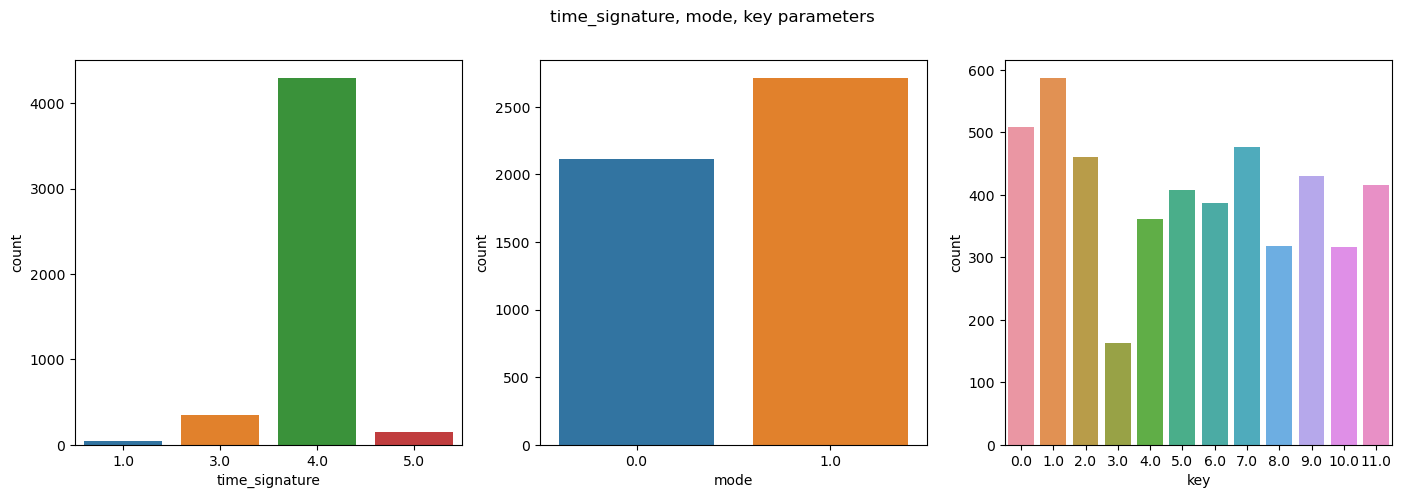

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5))
fig.suptitle('time_signature, mode, key parameters')
for i, col in enumerate(['time_signature', 'mode', 'key']):
    sns.countplot(ax=axes[i], x=col, data=df)

**Insights:** Most the songs are in Mayor tonality, Key most used is C and time_signature most used is 4(4/4). I think C key is most used in song because C represent joy and it’s used in many pop songs. Also time 4/4 is the basic beat used for songs.


Thinking more deeply these features above cannot be graph as distribution because has small unique values. On the other hand, the other features which can be plotted as distribution are skewed, how the mass is moved to right and left. Let’s see it.

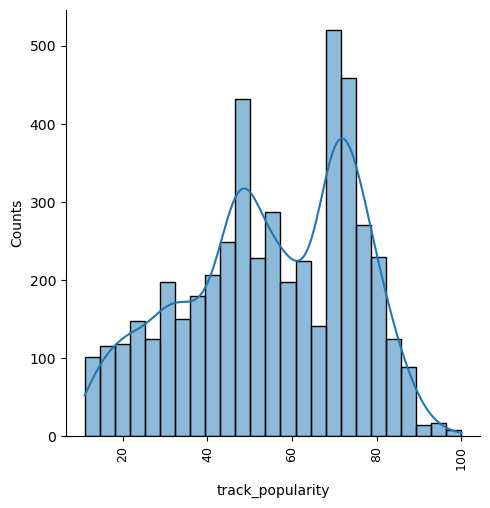

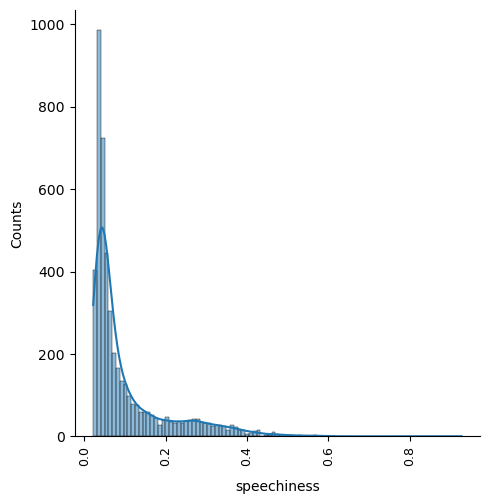

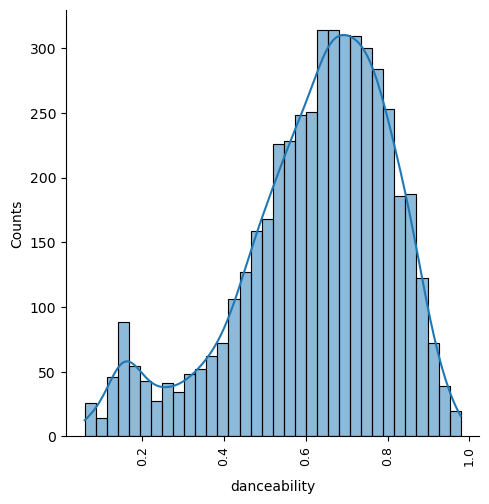

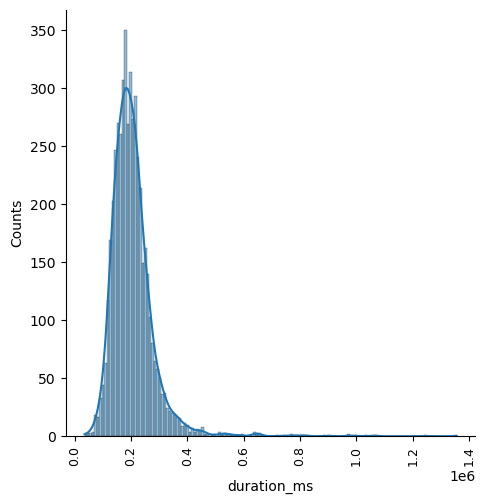

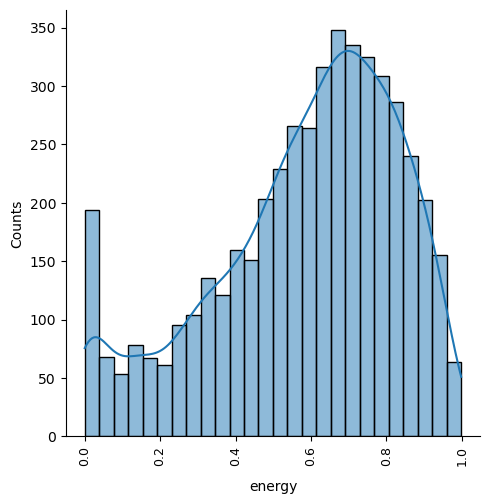

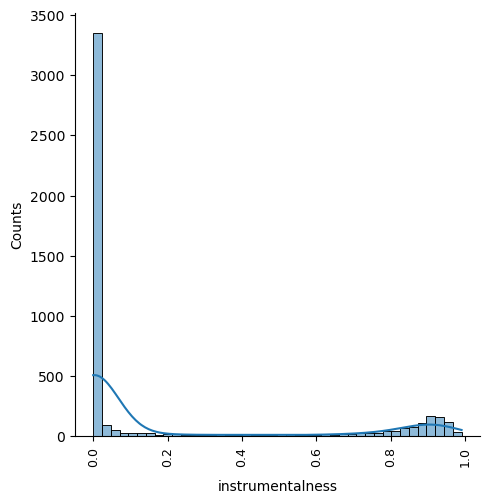

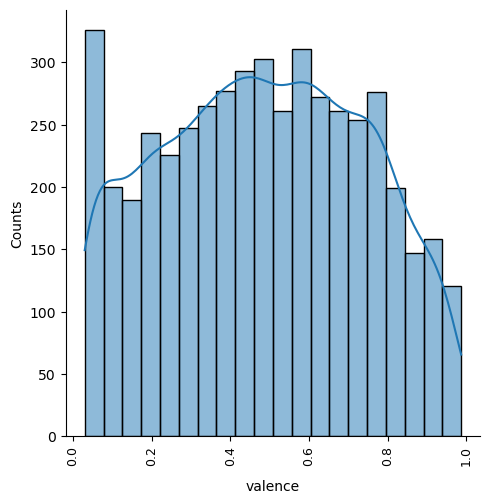

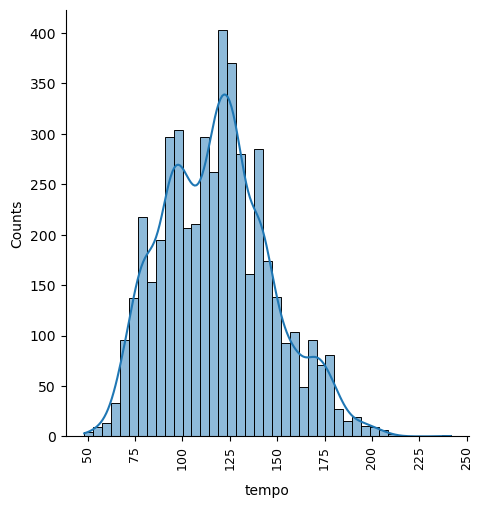

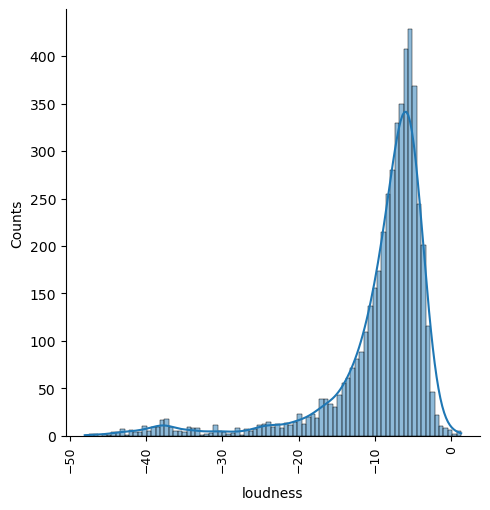

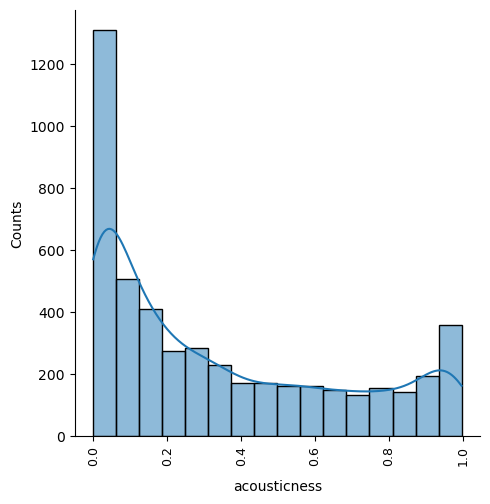

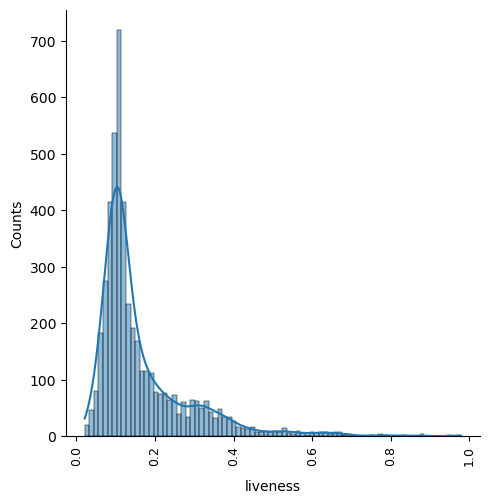

In [18]:
# Distribution plot
# Create a new list of numerical features without 'time_signature', 'mode', 'key'.
num_features_ = [num for num in num_features]
for dis in ['time_signature', 'mode', 'key']:
    num_features_.remove(dis)
num_features_

# Plotting
for col in num_features_:
    sns.displot(df[col], kde = True, height = 5 )
    plt.xticks(rotation=90, fontsize=9)
    plt.xlabel(col, labelpad=10)
    plt.ylabel('Counts')
    plt.show()

**Insights:** ‘loudness’ is skewed to the right. It means most of the mass is located to the right [-10, 0]. From Spotify API Documentation, this feature is related to quality of sounds marked in decibels(dB) correlated with physical amplitude. The range is between [-60dB, 0dB]. So that means most of songs have a good quality.

## Measures of central tendency and Measures of asymmetry

To get deeper meaning of each of them, we have to analyse there central tendency and asymmetric characteristic.

In [22]:
df[num_features_].describe()

,track_popularity,speechiness,danceability,duration_ms,energy,instrumentalness,valence,tempo,loudness,acousticness,liveness
count,4831.000000,4830.000000,4830.000000,4.830000e+03,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000
mean,54.761126,0.101738,0.622311,2.061508e+05,0.586691,0.201053,0.481930,118.269293,-9.281627,0.341217,0.167613
std,19.828573,0.101032,0.187706,8.174556e+04,0.246263,0.351918,0.258036,28.512615,7.129396,0.325382,0.124429
min,11.000000,0.021900,0.058900,3.537500e+04,0.000202,0.000000,0.029600,48.232000,-48.069000,0.000004,0.021000
25%,41.000000,0.038600,0.525000,1.590000e+05,0.442250,0.000000,0.275000,96.063000,-10.297750,0.052925,0.095400
50%,56.000000,0.056100,0.653000,1.948665e+05,0.633000,0.000091,0.483000,118.059500,-7.191000,0.224500,0.118000
75%,72.000000,0.118000,0.758000,2.334780e+05,0.777000,0.200500,0.690000,136.723500,-5.336750,0.590000,0.195000
max,100.000000,0.927000,0.979000,1.355260e+06,0.998000,0.991000,0.987000,241.426000,1.318000,0.996000,0.979000


In [25]:
# Used for Asymmetric measures
for i, j in zip(num_features_, list(skew(df[num_features_], axis=0, bias=True))):
    print("Feature: {} -> skew: {:.2f}".format(i,j))

Feature: track_popularity -> skew: -0.32
Feature: speechiness -> skew: nan
Feature: danceability -> skew: nan
Feature: duration_ms -> skew: nan
Feature: energy -> skew: nan
Feature: instrumentalness -> skew: nan
Feature: valence -> skew: nan
Feature: tempo -> skew: nan
Feature: loudness -> skew: nan
Feature: acousticness -> skew: nan
Feature: liveness -> skew: nan


Remember some theory about Skewness:

- Skewness = 0: Then normally distributed.
- Skewness > 0: Then more weight in the left tail of the distribution.
- Skewness < 0: Then more weight in the right tail of the distribution.

**Insights:** So we can confirm the features are 50/50 skewed to right and left. And ‘valence’ is not skewed because 0.00 value.